## The k-Nearest Neighbor Algorithm ##

We are provided with the income data for various individuals from their previous and new job to develop a system that can accurately classify an individual as either being stressed or not, based on the provided features. The provided data was first processed into a python pandas data frame for ease of implementation. The resulting data frame had two predictors (previous income and new income) and one label (stressed or not stressed). We implement, from scratch, the k-Nearest neighbor classifier.

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Defining the necessary functions ####

The kNN technique is an easy-to-implement technique that uses a distance metric to find the distance betwen a sample point and every other point in the dataset. Then, k nearest points will be selected based on the distance values, and the most comment class from this k points will be selected as the class to which the sample point belongs. This is a very strong baseline algorithm as it is logical, easy to understand, and implement. We only need one function - finding the distance and classifying a particular point and returning the result. However, it is required we select a k-value, which is where intuition and experience often come into play.

Since we are using a distance-based algorithm, we need to define our distance metric, which, in this case, is the euclidean distance. Interested readers can get resources from the internet. It simply finds the distance between two points on a plane. It takes the squares since we are only interested in the magnitude and not the direction.

In [2]:
# Define the function to perform the classification training
def kNN_classify(data_train, data_test, k):
    
    """
    Inputs: 
        data_train: the training data we are using out of the full dataset. This could be 80% of the overall
                    dataset. This is a dataframe object
        data_test:  the testing data which contains individual points we are trying to classify based on the
                    performance of our training data.  This is also a dataframe object.
        k:          the number of the nearest points we are selecting the majority class from.
    """
    
    # After the data is parsed, we rename it since we are unsure what the actual name is. Recall that only the
    # training data has the label and the test data does not. Therefore the below renaming also follows suit.
    data_test.columns = ['x1','x2']
    data_train.columns = ['xx1', 'xx2','y']
    
    # An empty list is declared to append the results in the future
    results = []
    
    # We loop through the dataset and start estimating the distance between the point and every other point 
    # in the training data. We store the class of each point it is compared with as well
    for i in range(0,len(data_test['x1'])):
        x_1 = data_test.loc[i,'x1']
        x_2 = data_test.loc[i,'x2']
        class_0 = 0
        class_1 = 0
        distance = [[1000,1000]]
        for j in range(0,len(data_train['y'])):
            y = data_train.loc[j,'y']
            dist = np.sqrt((x_1 - data_train.loc[j,'xx1'])**2 + (x_2 - data_train.loc[j,'xx2'])**2)
            if dist == 0:
                continue
            distance.extend([[dist,y]])
        distance = np.array(distance)
        distance = distance[np.argsort(distance[:,0])]
    
    # All the points in the training data belong to a class already known. We select k nearest points based on
    # the evaluated distances and count the class the belong to (stressed or not stressed and pick the majority
        for l in range(0,k):
            if distance[l][1] == 1:
                class_1 += 1
            else:
                class_0 += 1
            
        if class_1 > class_0:
            result = 1
        else:
            result = 0

        results.append(result)
    
    data_train.columns = ['P', 'N','y_true']
    
    return  results

# The k-NN algorithm is done!!!

#### Finding Classification Metrics - Balanced Accuracy, Precision, Recall, and F1 Score ####

The function below is to determine the performance of the classification algorithm using various classification metrics. Here, we use Balanced accuracy, Precision, Recall, and F1 score. Interested readers can read about the formulas using online resources.

In [3]:
# Define the function to check the performance
def performance(y_hypo,y,measure):
    """
    Pass the predictions, the actual ones, and the performance (as a string) required. This is done to measure
    the training and testing perfroamnce.
    
    """
    Q_00 = 0
    Q_11 = 0
    Q_01 = 0
    Q_10 = 0
    bal_accuracy = []
    recall = []
    precision = []
    f1_score = []
    
    
    # The false positives, false negatives, true positives, and true negatives are used to find the measures
    for j in range((np.shape(y_hypo)[0])):
        for i in range(len(y)):
            if y[i] == 0 and y_hypo[j][i] == 0:
                Q_00 = Q_00 + 1
            elif y[i] == 1 and y_hypo[j][i] == 1:
                Q_11 = Q_11 + 1
            elif y[i] == 0 and y_hypo[j][i] == 1:
                Q_01 = Q_01 + 1
            elif y[i] == 1 and y_hypo[j][i] == 0:
                Q_10 = Q_10 + 1 
                
    # The formula for each measure is provided below using the above-declared variables
        bal_acc = ((Q_11 /(Q_11+Q_10)) + (Q_00 / (Q_01+Q_00)))/2
        recall.append((Q_11 /(Q_11+Q_10)))
        precision.append((Q_11 /(Q_11+Q_01)))
        bal_accuracy.append(bal_acc)
        f1_score.append(2/((1/(Q_11 /(Q_11+Q_01)+1/(Q_11 /(Q_11+Q_10))))))
    
    # Returns the specific measure requested based on the input
    
    if measure == 'balanced accuracy':
        return bal_accuracy
    elif measure == 'precision':
        return precision
    elif measure == 'recall':
        return recall
    elif measure == 'f1_score':
        return f1_score
    else:
        return "Please ensure you have a valide measure"
    

#### Data Cleaning ####

In [4]:
data = pd.read_csv('Data.txt', delim_whitespace=True, header = None)
data.drop([2, 3, 4, 5], axis = 1, inplace = True)
data.drop([0, 1, 2], axis = 0, inplace = True)
data.columns = ['P', 'N']
inds = pd.isnull(data).any(1).nonzero()[0][0]

In [5]:
y_true = np.ones(len(data['P']))
for i in range(0,len(y_true)):
    if i < inds:
        y_true[i] = 0

In [6]:
data['y_true'] = y_true
data.dropna(inplace=True)
data.reset_index(inplace = True, drop = True)
data.drop(inds, inplace=True)
data['P'] = pd.to_numeric(data['P'])
data['N'] = pd.to_numeric(data['N'])
data.reset_index(inplace = True, drop = True)
data_test = data[['P','N']]

#### Specifying the training hyperparameters #####

In [7]:
# We are testing various values of k, ranging from 1 to 13 at increments of 2. Balanced accuracy is used here in
# case the data is unbalanced.

k = [1, 3, 5, 7, 9, 11, 13]
y_hypo = []
for i in k:
    output = kNN_classify(data, data_test, i)
    y_hypo.extend([output])
y = data.loc[:,'y_true']
y = y.values
bal_accuracy = performance(y_hypo,y,'balanced accuracy')

#### Plotting the results #####

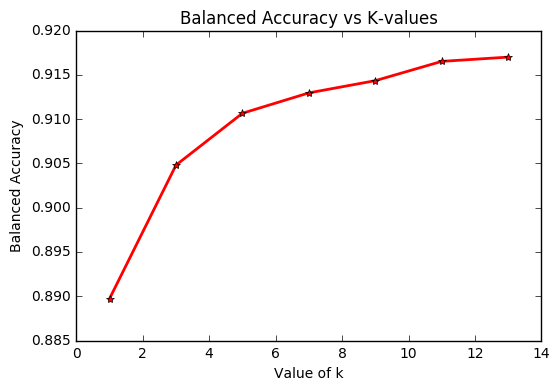

In [8]:
plt.plot(k,bal_accuracy,'-*',color = 'Red', lw = 2)
plt.title('Balanced Accuracy vs K-values')
plt.ylabel('Balanced Accuracy')
plt.xlabel('Value of k')

As the value increases, the accuracy also increases. It should also be noted that even the initial k value, 1, already provided a performance of 89%, which is a relatively acceptable accuracy. Further, at k values between 10 and 13, the relative improvement is very low when checked from the scale on the y-axis. The optimal value here is chosen as 7.

#### Conducting cross-validation for nine trials ####

Cross-validation is used to test the architecture of a particular system. We randomly pass various training and testing datasets at differents times and observe the perfoamnce of our system on these combinations.

In [9]:
bal_accuracy_trials_test = []
recall_trials_test = []
precision_trials_test = []
f1_score_trials_test = []



for i in range(0,9):
    X = data.loc[:,['P', 'N']]
    y = data.loc[:,'y_true']
    X = X.values
    y = y.values
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    data_2 = pd.DataFrame(X_train)
    data_2['y_true'] = pd.DataFrame(y_train)
    data_3 = pd.DataFrame(X_test)

    k = [7]
    y_hypo_test = []
    for i in k:
        sss = kNN_classify(data_2, data_3, i)
        y_hypo_test.extend([sss])
    y_2 = y_test
    bal_accuracy_trials_test.append(performance(y_hypo_test,y_2,'balanced accuracy')[0])
    recall_trials_test.append(performance(y_hypo_test,y_2,'recall')[0])
    precision_trials_test.append(performance(y_hypo_test,y_2,'precision')[0])
    f1_score_trials_test.append(performance(y_hypo_test,y_2,'f1_score')[0])

  

#### Plotting the corss-validation results ####

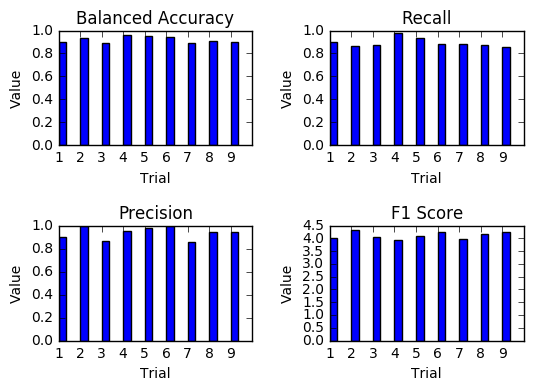

In [10]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']


x = np.arange(len(labels))  # the label locations
width = 0.35

fig, ((ax,ax2),(ax3,ax4)) = plt.subplots(2,2)
rects1 = ax.bar(x, bal_accuracy_trials_test, width, label='Test',color='blue')
ax.set_ylabel('Value')
ax.set_xlabel('Trial')
ax.set_title('Balanced Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)


rects1 = ax2.bar(x, recall_trials_test, width, label='Test',color='blue')
ax2.set_ylabel('Value')
ax2.set_xlabel('Trial')
ax2.set_title('Recall')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)


rects1 = ax3.bar(x, precision_trials_test, width, label='Test',color='blue')
ax3.set_ylabel('Value')
ax3.set_xlabel('Trial')
ax3.set_title('Precision')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)


rects1 = ax4.bar(x, f1_score_trials_test, width, label='Test',color='blue')
ax4.set_ylabel('Value')
ax4.set_xlabel('Trial')
ax4.set_title('F1 Score')
ax4.set_xticks(x)
ax4.set_xticklabels(labels)

plt.subplots_adjust(hspace=0.7,wspace = 0.4)

#### Obtianing the Means and Std Dev for each Metric ####

In [11]:
means = [np.mean(bal_accuracy_trials_test),np.mean(recall_trials_test), np.mean(precision_trials_test),np.mean(f1_score_trials_test)]
stds = [np.std(bal_accuracy_trials_test),np.std(recall_trials_test), np.std(precision_trials_test),np.std(f1_score_trials_test)]

In [12]:
means

[0.9202876774335232, 0.8932682258828986, 0.9390324590624667, 4.120640492864251]

In [13]:
stds

[0.025662227832980347,
 0.03667738365368329,
 0.04950280301747398,
 0.1238788701785812]

#### Drawing the decision boundary over the feature space ####

The decision boundary for the kNN algorithm is drawn by creating a grid over the feature space. In essence,
we create more dataset based on the existing ones using the simple grid/meshgrid function that interpolates
over the feature space and find the predictor variables. Note the the labels are not found, we use the decision
boundaries to find the class in which feature in the created grid belongs.

In [14]:
X_train = np.array(data.loc[:,['P', 'N']])
y_train = np.array(data.loc[:,'y_true'])

In [15]:
a = np.arange(start=X_train[:,0].min()-1, stop = X_train[:,0].max()+1, step = 1)
b = np.arange(start=X_train[:,1].min()-1, stop = X_train[:,1].max()+1, step = 1)

XX,YY = np.meshgrid(a,b)

In [16]:
input_array = np.array([XX.ravel(),YY.ravel()]).T
input_array = pd.DataFrame(input_array)

In [17]:
labels = kNN_classify(data,input_array,3)
labels = np.array(labels)

C:\Users\coola\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\coola\Anaconda3\lib\site-packages\numpy\ma\core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


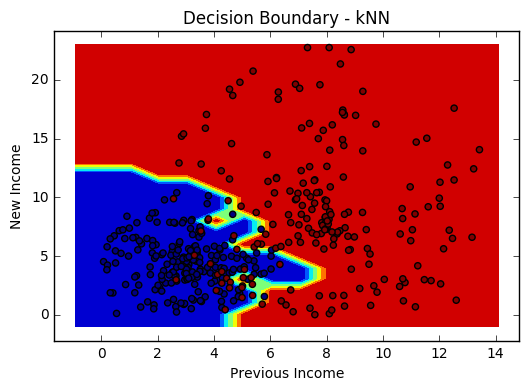

In [18]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.title("Decision Boundary - kNN")
plt.xlabel("Previous Income")
plt.ylabel("New Income")

The best decision boundary for the k-NN is shown above. This was done by creating a grid over the feature space and running the algorithm to make a classifier for each point on the grid. Based on this, a contour plot was used to create boundaries for both classes. The result shows a good surface for each class and some errors as some red classes are still within the blue region. This is expected as the data is not linearly separable.

##### Extra code to visualize the raw data #####

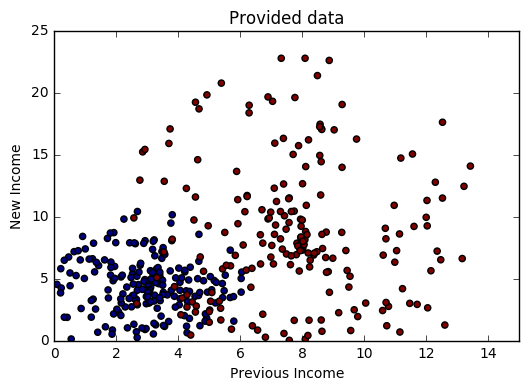

In [19]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.xlabel("Previous Income")
plt.ylabel("New Income")
plt.ylim((0, 25))
plt.xlim((0, 15))
plt.title('Provided data')